In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 12) for n in range(1, 12)])
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline

In [2]:
# rects008 = rects.loc[rects['wire_dia (mm)'] == 0.08]
# rects008.to_excel('rects008.xlsx')

In [3]:
# rects01 = rects.loc[rects['wire_dia (mm)'] == 0.1]
# rects01.to_excel('rects01.xlsx')

In [4]:
# rects_teeth = df.loc[df['file'].str.match('VEXPN2')]
# rects_teeth.to_excel('vexpn2xx.xlsx')

In [5]:
coil_freq = df.loc[df['freq'].notnull() & df['L, uH'].notnull()]
coil_freq['Lsqrt'] = coil_freq['L, uH'].apply(lambda x: 1/math.sqrt(x))
coil_freq

d:\work\python\jupyter\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,Lsqrt
28,V123NEW,148.288,0.08,0.2,5.0,44.3,63.2,4.636,17620.0,36.0,rect-inner-rect-5-0-5,0.464439
30,V123NEW1,119.562,0.08,0.2,4.0,44.3,63.2,3.253,21370.0,40.0,"rect-inner-rect-4-0-4-(3,227)",0.554444
54,V202,76.766,0.08,0.2,3.0,45.0,79.0,2.656,24000.0,22.0,rect-v,0.613601
55,V202,76.766,0.10,0.2,3.0,45.0,79.0,2.601,24000.0,22.0,rect-v,0.620054
56,V203,76.546,0.08,0.3,3.0,45.0,79.0,2.561,24000.0,22.0,rect-v,0.624878
...,...,...,...,...,...,...,...,...,...,...,...,...
275,VID1FS25,138.427,0.08,0.3,6.0,44.7,78.5,5.728,14390.0,65.0,t,0.417829
277,VID1FS26,146.967,0.08,0.3,6.0,44.7,78.5,6.084,13900.0,63.0,t,0.405420
299,VMEDVED,93.797,0.08,0.3,3.0,49.7,78.2,2.777,24000.0,22.0,medved,0.600084
304,VMO1,111.706,0.10,0.3,4.0,45.0,79.0,4.211,18470.0,59.0,text-MO,0.487312


(0, 25000)

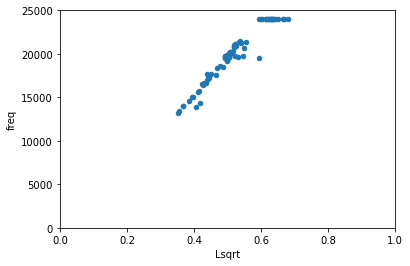

In [6]:
ax = coil_freq.plot.scatter(x='Lsqrt', y='freq')
ax.set_xlim(0, 1)
ax.set_ylim(0, 25000)

In [7]:
coil_working = coil_freq.loc[coil_freq['freq'] < 23500]
coil_working

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,Lsqrt
28,V123NEW,148.288,0.08,0.2,5.0,44.3,63.2,4.636,17620.0,36.0,rect-inner-rect-5-0-5,0.464439
30,V123NEW1,119.562,0.08,0.2,4.0,44.3,63.2,3.253,21370.0,40.0,"rect-inner-rect-4-0-4-(3,227)",0.554444
72,V302,100.611,0.08,0.2,4.0,45.0,79.0,4.029,19140.0,63.0,rect-v,0.498197
73,V302,100.611,0.10,0.2,4.0,45.0,79.0,4.019,19250.0,67.0,rect-v,0.498817
74,V303,100.207,0.08,0.3,4.0,45.0,79.0,3.887,19940.0,57.0,rect-v,0.507216
...,...,...,...,...,...,...,...,...,...,...,...,...
256,VID1196,94.653,0.10,0.3,4.0,45.2,79.0,4.950,17650.0,60.0,rect-round-corners,0.449467
275,VID1FS25,138.427,0.08,0.3,6.0,44.7,78.5,5.728,14390.0,65.0,t,0.417829
277,VID1FS26,146.967,0.08,0.3,6.0,44.7,78.5,6.084,13900.0,63.0,t,0.405420
304,VMO1,111.706,0.10,0.3,4.0,45.0,79.0,4.211,18470.0,59.0,text-MO,0.487312


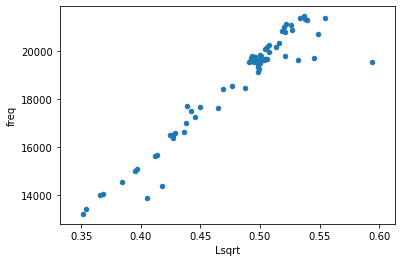

In [8]:
ax2 = coil_working.plot.scatter(x='Lsqrt', y='freq')
# ax2.set_xlim(0.3, 0.65)
# ax2.set_ylim(10000, 24000)

In [9]:
rects

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod
2,V1002,272.016,0.08,0.2,11.0,46.0,78.0,23.140,NaN,NaN,rect-v
3,V1002,272.016,0.10,0.2,11.0,46.0,78.0,23.000,NaN,NaN,rect-v
4,V1003,272.215,0.08,0.3,11.0,46.0,78.0,21.160,NaN,NaN,rect-v
5,V1003,272.215,0.10,0.3,11.0,46.0,78.0,20.890,NaN,NaN,rect-v
6,V1004,272.072,0.08,0.4,11.0,46.0,78.0,19.712,NaN,NaN,rect-v
...,...,...,...,...,...,...,...,...,...,...,...
170,V903,246.575,0.10,0.3,10.0,46.0,78.0,17.750,NaN,NaN,rect-v
171,V904,246.117,0.08,0.4,10.0,46.0,78.0,16.741,NaN,NaN,rect-v
172,V904,246.117,0.10,0.4,10.0,46.0,78.0,16.559,NaN,NaN,rect-v
173,V905,245.877,0.08,0.5,10.0,46.0,78.0,15.742,NaN,NaN,rect-v


In [16]:
rects_freq = rects.loc[rects['freq'].notnull() & rects['L, uH'].notnull()]
rects_freq = rects_freq.loc[rects_freq['freq'] < 23500]
rects_freq

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod
72,V302,100.611,0.08,0.2,4.0,45.0,79.0,4.029,19140.0,63.0,rect-v
73,V302,100.611,0.10,0.2,4.0,45.0,79.0,4.019,19250.0,67.0,rect-v
74,V303,100.207,0.08,0.3,4.0,45.0,79.0,3.887,19940.0,57.0,rect-v
75,V303,100.207,0.10,0.3,4.0,45.0,79.0,3.789,20160.0,66.0,rect-v
76,V304,99.858,0.08,0.4,4.0,45.0,79.0,3.318,20720.0,68.0,rect-v
77,V304,99.858,0.10,0.4,4.0,45.0,79.0,3.605,20880.0,71.0,rect-v
78,V305,99.494,0.08,0.5,4.0,45.0,79.0,3.437,21290.0,64.0,rect-v
79,V305,99.494,0.10,0.5,4.0,45.0,79.0,3.458,21320.0,73.0,rect-v
94,V402,124.296,0.08,0.2,5.0,45.0,79.0,5.899,15630.0,59.0,rect-v
95,V402,124.296,0.10,0.2,5.0,45.0,79.0,5.835,15690.0,66.0,rect-v


In [17]:
rects_freq['Lsqrt'] = rects_freq['L, uH'].apply(lambda x: 1/math.sqrt(x))
rects_freq

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,Lsqrt
72,V302,100.611,0.08,0.2,4.0,45.0,79.0,4.029,19140.0,63.0,rect-v,0.498197
73,V302,100.611,0.10,0.2,4.0,45.0,79.0,4.019,19250.0,67.0,rect-v,0.498817
74,V303,100.207,0.08,0.3,4.0,45.0,79.0,3.887,19940.0,57.0,rect-v,0.507216
75,V303,100.207,0.10,0.3,4.0,45.0,79.0,3.789,20160.0,66.0,rect-v,0.513733
76,V304,99.858,0.08,0.4,4.0,45.0,79.0,3.318,20720.0,68.0,rect-v,0.548987
77,V304,99.858,0.10,0.4,4.0,45.0,79.0,3.605,20880.0,71.0,rect-v,0.526681
78,V305,99.494,0.08,0.5,4.0,45.0,79.0,3.437,21290.0,64.0,rect-v,0.539399
79,V305,99.494,0.10,0.5,4.0,45.0,79.0,3.458,21320.0,73.0,rect-v,0.537759
94,V402,124.296,0.08,0.2,5.0,45.0,79.0,5.899,15630.0,59.0,rect-v,0.411728
95,V402,124.296,0.10,0.2,5.0,45.0,79.0,5.835,15690.0,66.0,rect-v,0.413980


(0, 25000)

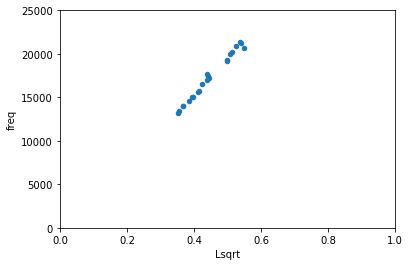

In [21]:
ax3 = rects_freq.plot.scatter(x='Lsqrt', y='freq')
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 25000)

In [7]:
coil_freqs = df.loc[df['freq'].notnull()]
coil_freqs.to_excel('coil_freqs.xlsx')

In [9]:
coil_working = coil_freqs.loc[coil_freqs['freq'] != 24000]
coil_working.to_excel('coil_working.xlsx')